### Importing modules

In [3]:
## Run this section

import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Start Running all the cells from here once daily

#### Importing from Ministry of Health

In [4]:
## Start running

latest = pd.read_html("https://www.mohfw.gov.in/")[1]
latest = latest.drop(['S. No.'], axis=1)

In [5]:
latest.columns = ['State/UnionTerritory', 'ConfirmedIndianNational',
       'ConfirmedForeignNational', 'Cured', 'Deaths']

In [6]:
latest['Date'] = str(datetime.date.today())

In [7]:
latest = latest[:-1]

### Merging latest data and previous data

In [8]:
old_covid = pd.read_csv("covid.csv")


In [9]:
## Deleting today's record to avoid overwriting
old_covid = old_covid[old_covid['Date'] != str(datetime.date.today())]

In [10]:
## Merge
covid = pd.concat([old_covid, latest], ignore_index=True)

## Updating covid database
covid.to_csv("covid.csv", index=False)

## Work with updated covid DF.

C:\Users\Subham\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [11]:
# Converting to datetime
covid['Date'] = pd.to_datetime(covid['Date'])

## Stop Running all the cells here

### Formatting Beds

Call **beds.csv** as *beds* 

In [12]:
## Start running
beds = pd.read_csv('beds.csv')
beds.head()

,State/UnionTerritory,PrimaryHealthCenters,CommunityHealthCenters,SubDistrictHospitals,DistrictHospitals,TotalPublicHealthFacilities,NumPublicBeds,RuralHospitals,NumRuralBeds,UrbanHospitals,NumUrbanBeds
0,Andaman & Nicobar Islands,27,4,0,3,34,1246,27,575,3,500
1,Andhra Pradesh,1417,198,31,20,1666,60799,193,6480,65,16658
2,Arunachal Pradesh,122,62,0,15,199,2320,208,2136,10,268
3,Assam,1007,166,14,33,1220,19115,1176,10944,50,6198
4,Bihar,2007,63,33,43,2146,17796,930,6083,103,5936


### Census Formatting

Call **census.csv** as census

In [13]:
# Run this
census = pd.read_csv("census.csv")
census.head()

,State/UnionTerritory,Population,Rural,Urban,Area-sqkm,Density-/sqkm,SexRatio
0,Uttar Pradesh,199812341,155317278,44495063,240928,828.0,912
1,Maharashtra,112374333,61556074,50818259,307713,365.0,929
2,Bihar,104099452,92341436,11758016,94163,1102.0,918
3,West Bengal,91276115,62183113,29093002,88752,1029.0,953
4,Madhya Pradesh,72626809,52557404,20069405,308245,236.0,931


=====================================================================================

## Study of COVID 19 IN

In [14]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 6 columns):
ConfirmedForeignNational    316 non-null int64
ConfirmedIndianNational     316 non-null int64
Cured                       316 non-null int64
Date                        316 non-null datetime64[ns]
Deaths                      316 non-null int64
State/UnionTerritory        316 non-null object
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 14.9+ KB


In [15]:
covid['ConfirmedForeignNational'] = covid['ConfirmedForeignNational'].apply(int)
covid['ConfirmedIndianNational'] = covid['ConfirmedIndianNational'].apply(int)

In [16]:
covid['Total Active'] = covid['ConfirmedForeignNational'] + covid['ConfirmedIndianNational'] - covid['Cured']
covid['Total'] = covid['ConfirmedForeignNational'] + covid['ConfirmedIndianNational'] 

In [17]:
india = covid.groupby('Date').sum()
india

,ConfirmedForeignNational,ConfirmedIndianNational,Cured,Deaths,Total Active,Total
Date,,,,,,
2020-01-30,0,1,0,0,1,1
2020-01-31,0,1,0,0,1,1
2020-02-01,0,2,0,0,2,2
2020-02-02,0,3,0,0,3,3
2020-02-03,0,3,0,0,3,3
2020-02-04,0,3,0,0,3,3
2020-02-05,0,3,0,0,3,3
2020-02-06,0,3,0,0,3,3
2020-02-07,0,3,0,0,3,3


In [18]:
## importing plot.ly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

### EDA India

In [19]:
india[['Total','ConfirmedIndianNational','ConfirmedForeignNational']].iplot(
    title='CUMULATIVE COUNT',
    colors={'Total':'black','ConfirmedIndianNational':'orange',
            'ConfirmedForeignNational':'blue'}, width=2.5,
    xTitle='30th Jan 2020 -> today', yTitle='Confirmed cases')

In [20]:
india[['Total Active','Cured','Deaths']].iplot(title='[ACTIVE CASES]\nHOSPITALIZED vs CURED vs DEATH',
                                      colors={'Total Active':'blue','Cured':'green','Deaths':'red'}, width=2.5
                                              ,xTitle='30th Jan 2020 -> today', yTitle='Confirmed cases')

**80% of the affected people will be safe** if heathcare system doesn't breakdown

In [21]:
india['Safe-Zone'] = india['Total']*0.8

In [22]:
india[['Total','Safe-Zone']].iplot(title='CUMULATIVE COUNT',
                    colors={'Total':'black', 'Safe-Zone':'blue'}, width=2.5
                    ,xTitle='30th Jan 2020 -> today', yTitle='Confirmed cases')

In [23]:
init = 0
ls = []
for x in india['Total']:
    ls.append(x-init)
    init=x
print(ls)
india['Rise'] = ls

[1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 22, 2, 1, 3, 5, 7, 12, 2, 14, 7, 3, 26, 4, 23, 14, 22, 50, 60, 77, 73]


In [24]:
india['Rise'].iplot(kind='bar', sharing='public', title='DAILY RISE IN CASES', colors={'Rise':'indigo'}, width=2.5
                    ,xTitle='30th Jan 2020 -> today', yTitle='Confirmed cases')

#### Statewise statistics

In [25]:
states = latest.copy()
states.drop(['Date'], axis=1, inplace=True)
states['ConfirmedForeignNational']=states['ConfirmedForeignNational'].apply(int)
states['ConfirmedIndianNational']=states['ConfirmedIndianNational'].apply(int)
states['Total'] = states['ConfirmedForeignNational']+states['ConfirmedIndianNational']
states.set_index('State/UnionTerritory', inplace=True)
states

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total
State/UnionTerritory,,,,,
Andhra Pradesh,7,0,0,0,7
Bihar,2,0,0,1,2
Chhattisgarh,1,0,0,0,1
Delhi,28,1,5,1,29
Gujarat,29,0,0,1,29
Haryana,12,14,0,0,26
Himachal Pradesh,2,0,0,0,2
Karnataka,33,0,2,1,33
Kerala,60,7,3,0,67


In [26]:
states.iplot(kind='bar')

#### Working on map of India

In [27]:
# Because we're making some modifications according to geopandas
map_state = states.copy()

In [28]:
map_state.index = ['Andhra Pradesh', 'Bihar', 'Chhattisgarh', 'NCT of Delhi', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Tamil Nadu', 'Telangana', 'Chandigarh', 'Jammu & Kashmir', 'Ladakh',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal']

In [29]:
## Merging Ladakh with J&K
map_state.loc['Jammu & Kashmir'] = map_state.loc['Jammu & Kashmir']+map_state.loc['Ladakh']

In [30]:
import geopandas as gpd
import descartes

In [31]:
fp = "Igismap/Indian_States.shp"  #Download this file available on the internet.
map_df = gpd.read_file(fp)

In [32]:
map_df=map_df.set_index('st_nm')
map_df.index # To tally the names

Index(['Andaman & Nicobar Island', 'Arunanchal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadara & Nagar Havelli', 'Daman & Diu',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'NCT of Delhi', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'Odisha', 'Andhra Pradesh'],
      dtype='object', name='st_nm')

In [33]:
merged = map_df.join(map_state) #with index as statename
merged['Total'].fillna(0, inplace=True)
merged

,geometry,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total
st_nm,,,,,,
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",NaN,NaN,NaN,NaN,0.0
Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",NaN,NaN,NaN,NaN,0.0
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",NaN,NaN,NaN,NaN,0.0
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",2.0,0.0,0.0,1.0,2.0
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",6.0,0.0,0.0,0.0,6.0
Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",1.0,0.0,0.0,0.0,1.0
Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650...",NaN,NaN,NaN,NaN,0.0
Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...",NaN,NaN,NaN,NaN,0.0
Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",NaN,NaN,NaN,NaN,0.0


C:\Users\Subham\Anaconda3\lib\site-packages\matplotlib\colors.py:479: RuntimeWarning:

invalid value encountered in less

C:\Users\Subham\Anaconda3\lib\site-packages\matplotlib\colors.py:479: RuntimeWarning:

invalid value encountered in less

C:\Users\Subham\Anaconda3\lib\site-packages\matplotlib\colors.py:479: RuntimeWarning:

invalid value encountered in less



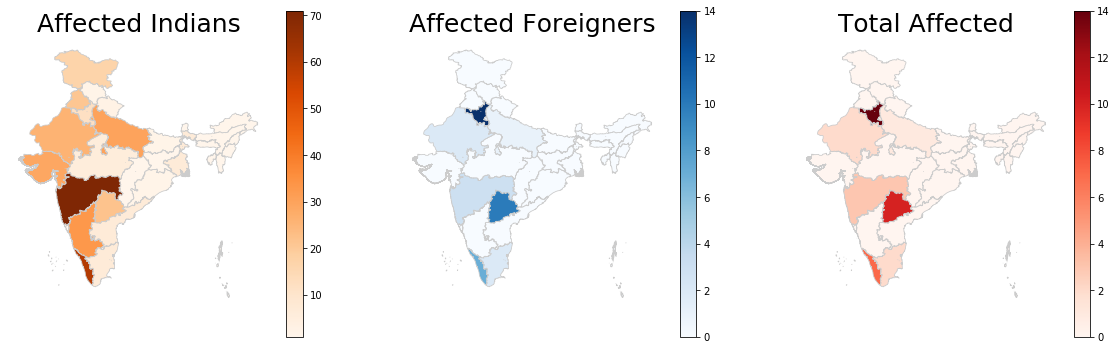

In [73]:
fig, axes = plt.subplots(ncols=3, figsize=(20,6))
t=0
for ax in axes: 
    if t==0:
        ax.axis('off')
        ax.set_title('Affected Indians', fontdict={'fontsize': '25', 'fontweight' : '3'})

        merged.plot(column='ConfirmedIndianNational', cmap='Oranges', 
                    linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
        t=1
    elif t==1:
        ax.axis('off')
        ax.set_title('Affected Foreigners', fontdict={'fontsize': '25', 'fontweight' : '3'})

        merged.plot(column='ConfirmedForeignNational', cmap='Blues', 
                    linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
        t=2
    else:
        ax.axis('off')
        ax.set_title('Total Affected', fontdict={'fontsize': '25', 'fontweight' : '3'})

        merged.plot(column='ConfirmedForeignNational', cmap='Reds', 
                    linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

In [74]:
fig.savefig("statewise_affected.png", dpi=1000)

C:\Users\Subham\Anaconda3\lib\site-packages\matplotlib\colors.py:479: RuntimeWarning:

invalid value encountered in less

C:\Users\Subham\Anaconda3\lib\site-packages\matplotlib\colors.py:479: RuntimeWarning:

invalid value encountered in less



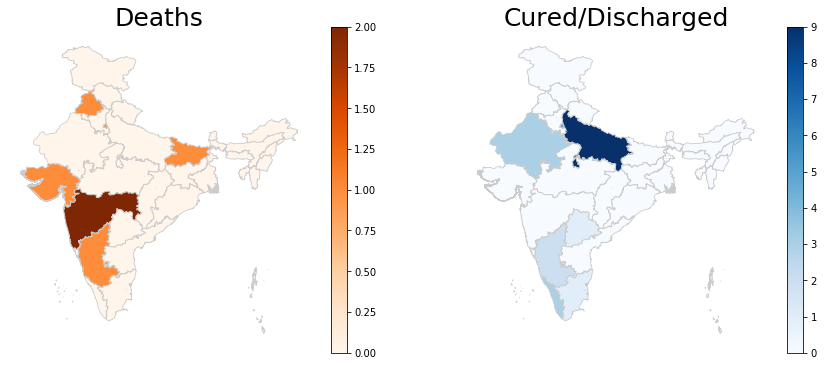

In [75]:
fig, axes = plt.subplots(ncols=2, figsize=(15,6))
t=0
for ax in axes: 
    if t==0:
        ax.axis('off')
        ax.set_title('Deaths', fontdict={'fontsize': '25', 'fontweight' : '3'})

        merged.plot(column='Deaths', cmap='Oranges', 
                    linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
        t=1
    elif t==1:
        ax.axis('off')
        ax.set_title('Cured/Discharged', fontdict={'fontsize': '25', 'fontweight' : '3'})

        merged.plot(column='Cured', cmap='Blues', 
                    linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

In [76]:
fig.savefig("death_cure.png", dpi=1000)